In [1]:
#importing lib
import numpy as np   
import pandas as pd
import os
import matplotlib.pyplot as plt 
import scipy.stats as stats
import seaborn as sns
import matplotlib.style
plt.style.use('seaborn')

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel(r'E:\DSBA\12. MRA\Project\Sales_Data.xlsx')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ORDERNUMBER,2747.0,10259.761558,91.877521,10100.00,10181.000,10264.00,10334.500,10425.00
QUANTITYORDERED,2747.0,35.103021,9.762135,6.00,27.000,35.00,43.000,97.00
PRICEEACH,2747.0,101.098951,42.042548,26.88,68.745,95.55,127.100,252.87
ORDERLINENUMBER,2747.0,6.491081,4.230544,1.00,3.000,6.00,9.000,18.00
SALES,2747.0,3553.047583,1838.953901,482.13,2204.350,3184.80,4503.095,14082.80
DAYS_SINCE_LASTORDER,2747.0,1757.085912,819.280576,42.00,1077.000,1761.00,2436.500,3562.00
MSRP,2747.0,100.691664,40.114802,33.00,68.000,99.00,124.000,214.00


In [5]:
df.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

In [6]:
df.shape

(2747, 20)

In [7]:
df['year'] = pd.DatetimeIndex(df['ORDERDATE']).year
df['month'] = pd.DatetimeIndex(df['ORDERDATE']).month
df['quarter'] = df['ORDERDATE'].dt.to_period('Q')

In [8]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,...,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,year,month,quarter
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,...,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small,2018,2,2018Q1
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,...,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small,2018,5,2018Q2
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,...,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium,2018,7,2018Q3
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,...,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium,2018,8,2018Q3
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,...,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium,2018,10,2018Q4


In [9]:
df.nunique()

ORDERNUMBER              298
QUANTITYORDERED           58
PRICEEACH               1984
ORDERLINENUMBER           18
SALES                   2690
ORDERDATE                246
DAYS_SINCE_LASTORDER    1832
STATUS                     6
PRODUCTLINE                7
MSRP                      80
PRODUCTCODE              109
CUSTOMERNAME              89
PHONE                     88
ADDRESSLINE1              89
CITY                      71
POSTALCODE                73
COUNTRY                   19
CONTACTLASTNAME           76
CONTACTFIRSTNAME          72
DEALSIZE                   3
year                       3
month                     12
quarter                   10
dtype: int64

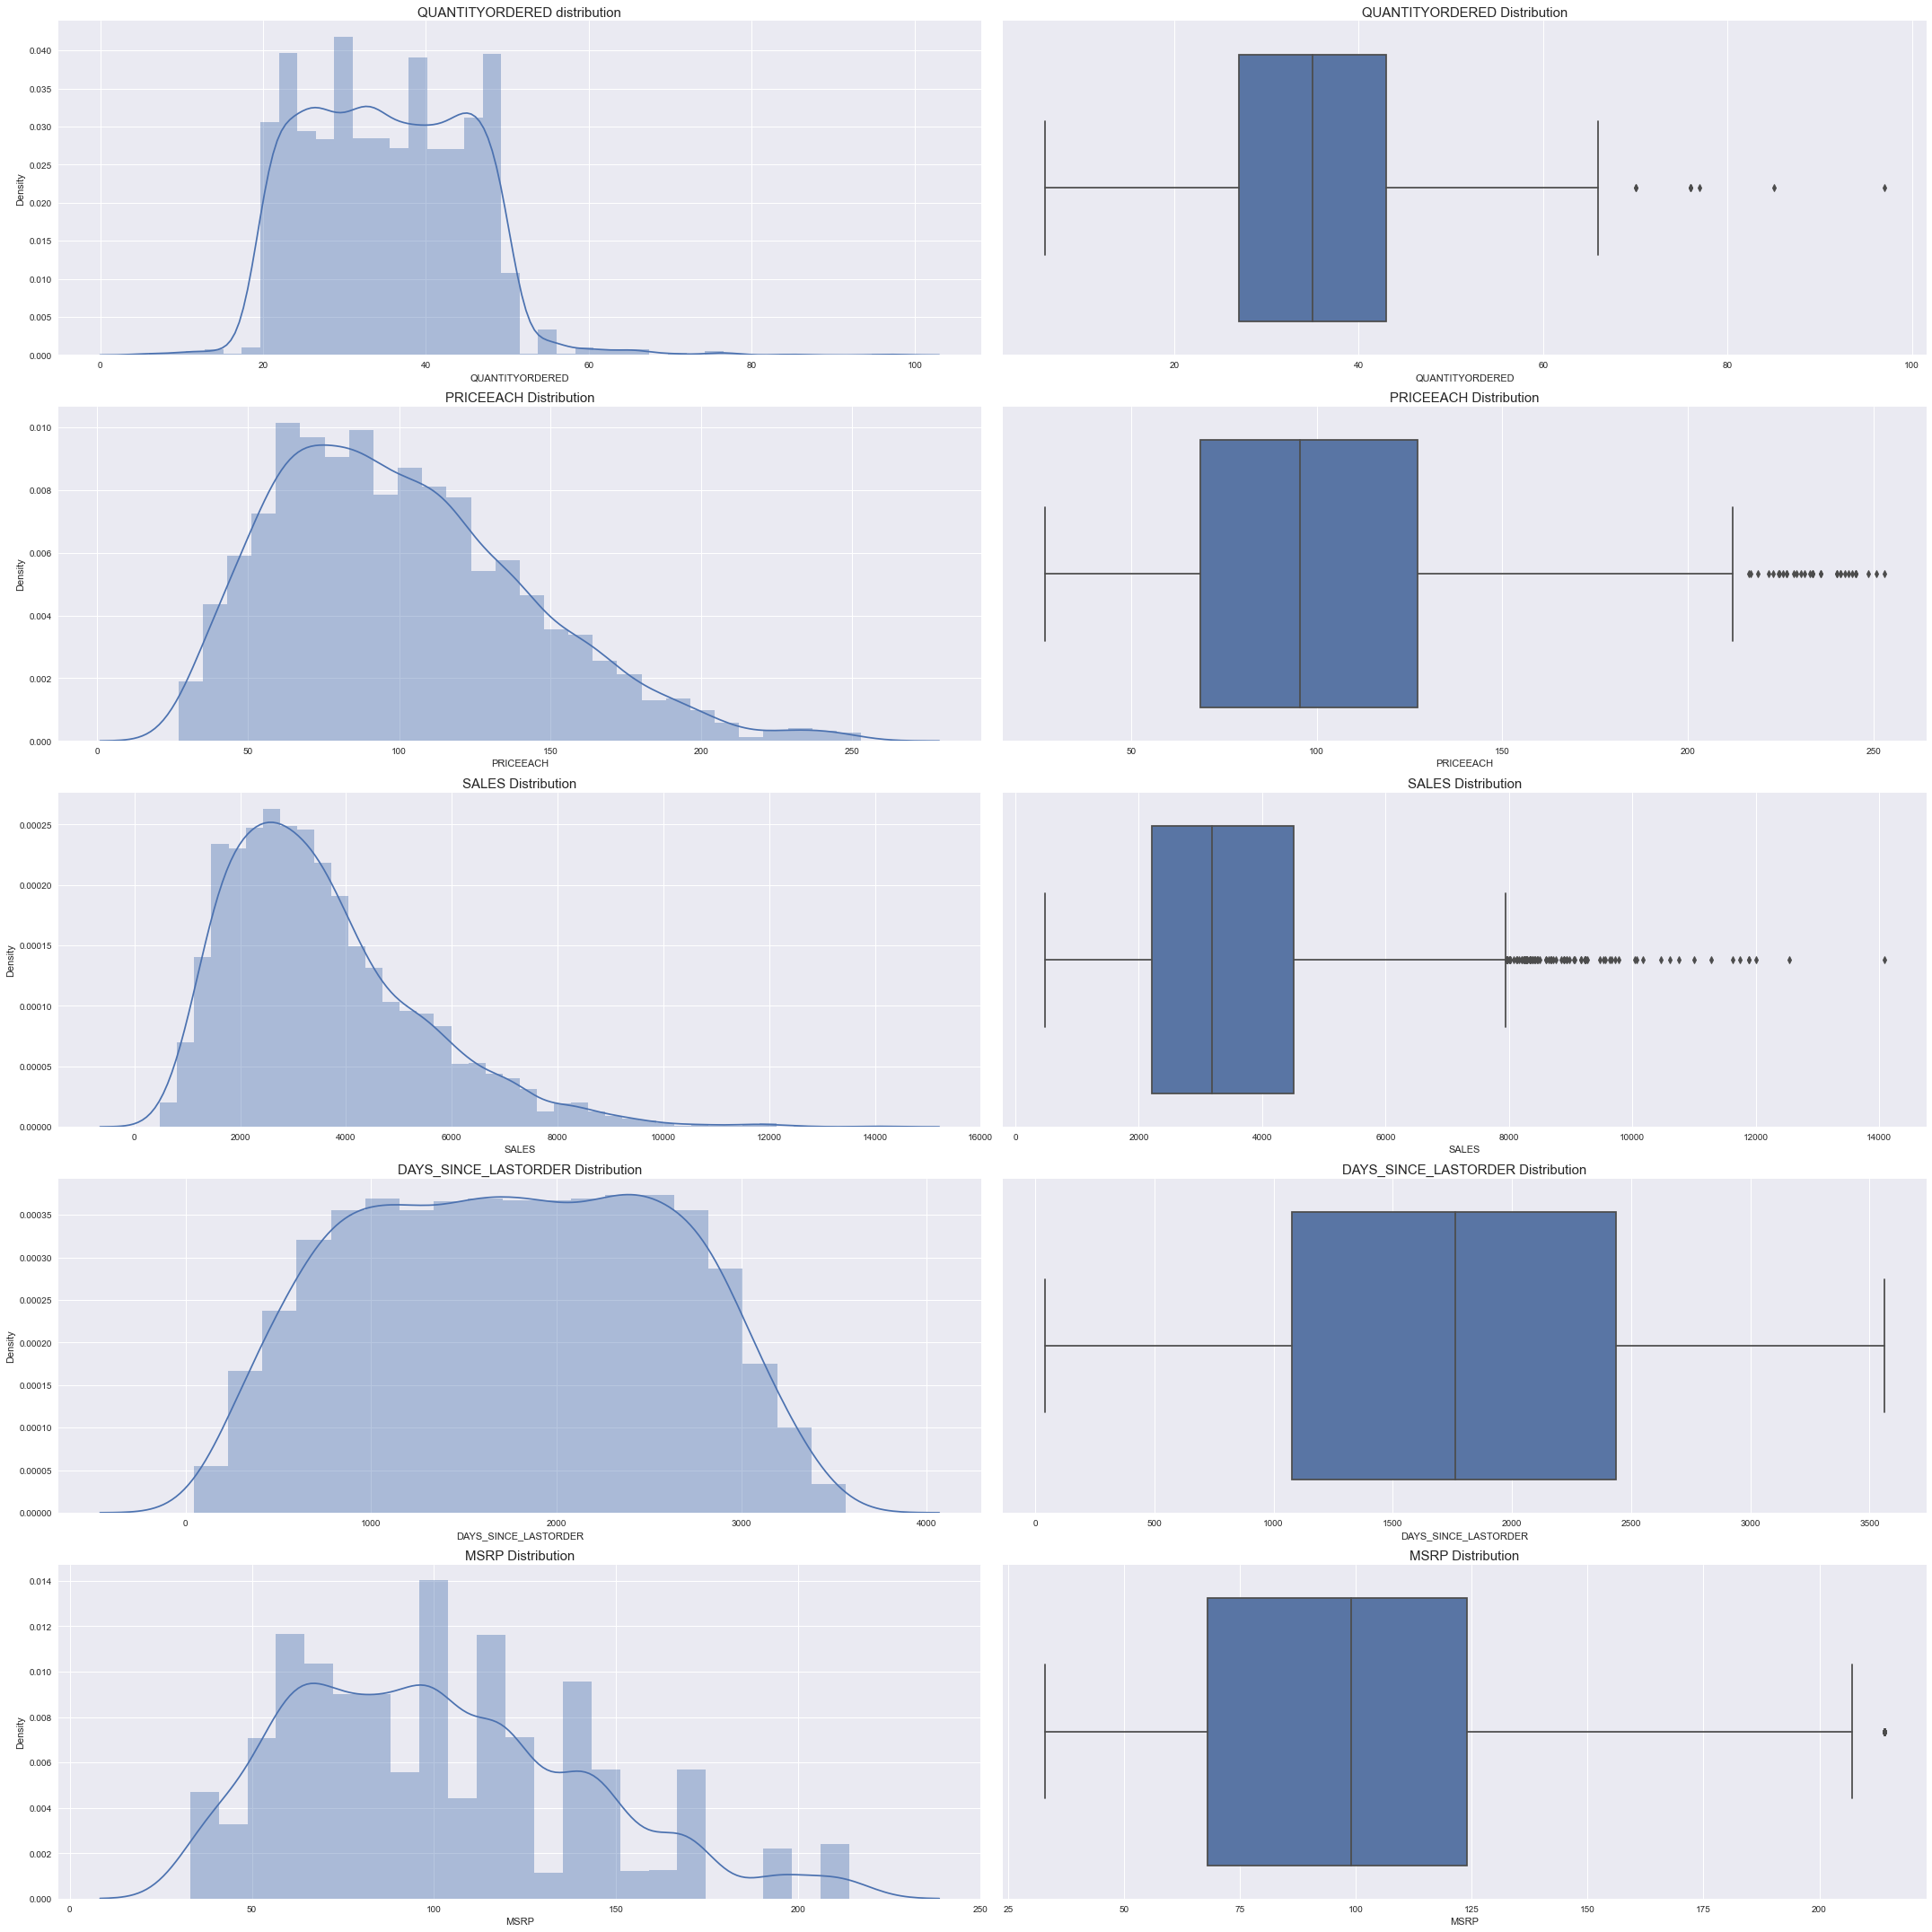

In [10]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(30,30)

a = sns.distplot(df['QUANTITYORDERED'] , ax=axes[0][0])
a.set_title("QUANTITYORDERED distribution",fontsize=15)

a = sns.boxplot(df['QUANTITYORDERED'] , orient = "v" , ax=axes[0][1])
a.set_title("QUANTITYORDERED Distribution",fontsize=15)

a = sns.distplot(df['PRICEEACH'] , ax=axes[1][0])
a.set_title("PRICEEACH Distribution",fontsize=15)

a = sns.boxplot(df['PRICEEACH'] , orient = "v" , ax=axes[1][1])
a.set_title("PRICEEACH Distribution",fontsize=15)

a = sns.distplot(df['SALES'] , ax=axes[2][0])
a.set_title("SALES Distribution",fontsize=15)

a = sns.boxplot(df['SALES'] , orient = "v" , ax=axes[2][1])
a.set_title("SALES Distribution",fontsize=15)


a = sns.distplot(df['DAYS_SINCE_LASTORDER'] , ax=axes[3][0])
a.set_title("DAYS_SINCE_LASTORDER Distribution",fontsize=15)

a = sns.boxplot(df['DAYS_SINCE_LASTORDER'] , orient = "v" , ax=axes[3][1])
a.set_title("DAYS_SINCE_LASTORDER Distribution",fontsize=15)

a = sns.distplot(df['MSRP'] , ax=axes[4][0])
a.set_title("MSRP Distribution",fontsize=15)

a = sns.boxplot(df['MSRP'] , orient = "v" , ax=axes[4][1])
a.set_title("MSRP Distribution",fontsize=15)

plt.tight_layout()
plt.show()

In [11]:
df.corr()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP,year,month
ORDERNUMBER,1.000000,0.067110,-0.003369,-0.054300,0.037289,-0.251476,-0.013910,0.903582,-0.028515
QUANTITYORDERED,0.067110,1.000000,0.010161,-0.016295,0.553359,-0.021923,0.020551,0.070520,-0.037926
PRICEEACH,-0.003369,0.010161,1.000000,-0.052646,0.808287,-0.397092,0.778393,-0.012493,0.017535
ORDERLINENUMBER,-0.054300,-0.016295,-0.052646,1.000000,-0.057414,0.046615,-0.020956,-0.055058,0.029180
SALES,0.037289,0.553359,0.808287,-0.057414,1.000000,-0.334274,0.634849,0.033604,-0.010200
DAYS_SINCE_LASTORDER,-0.251476,-0.021923,-0.397092,0.046615,-0.334274,1.000000,-0.524285,-0.224787,-0.011207
MSRP,-0.013910,0.020551,0.778393,-0.020956,0.634849,-0.524285,1.000000,-0.016434,0.005306
year,0.903582,0.070520,-0.012493,-0.055058,0.033604,-0.224787,-0.016434,1.000000,-0.421548
month,-0.028515,-0.037926,0.017535,0.029180,-0.010200,-0.011207,0.005306,-0.421548,1.000000


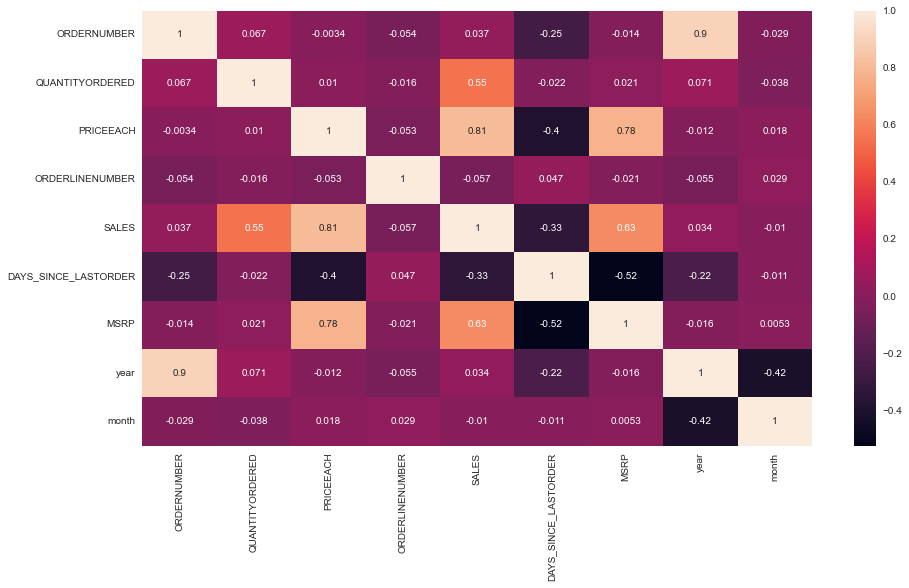

In [12]:
plt.subplots(figsize=(15,8))
sns.heatmap(df.corr(),annot = True);

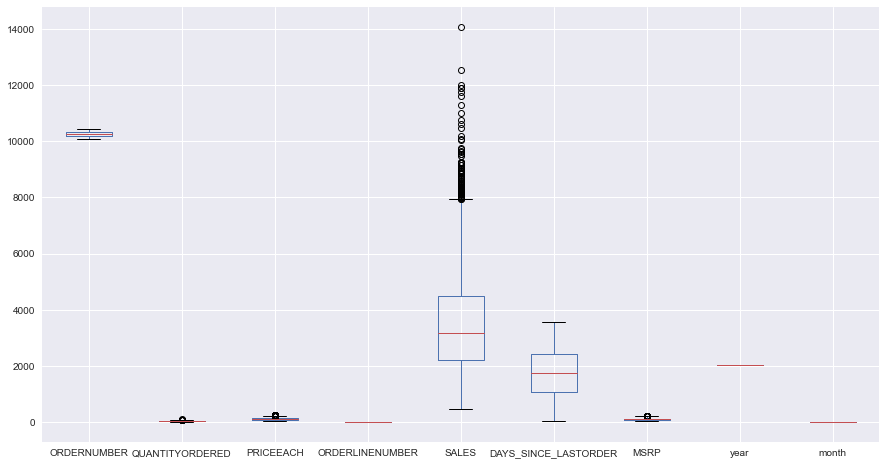

In [13]:
df.boxplot(figsize=(15,8));

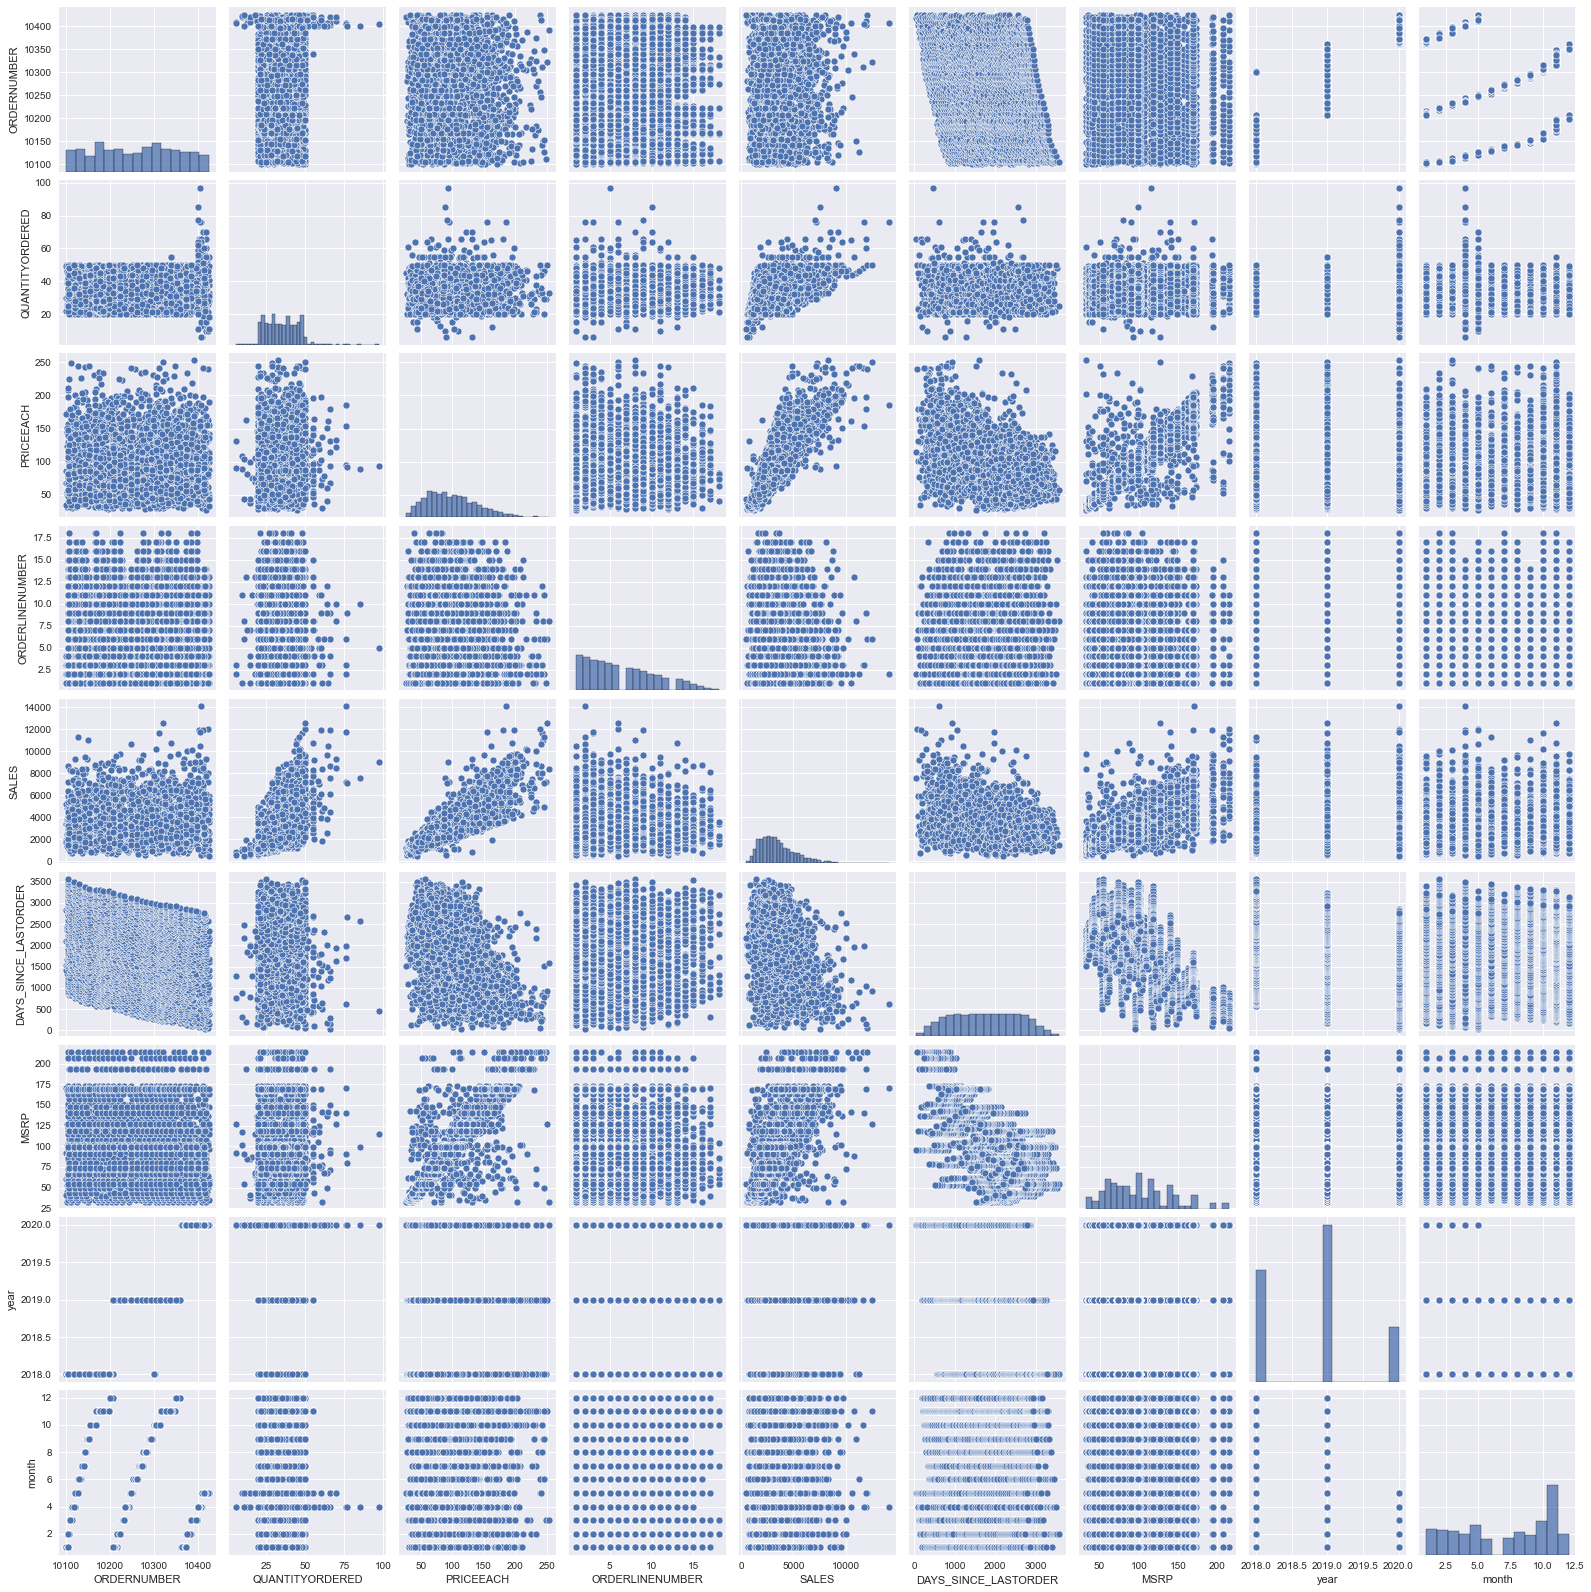

In [14]:
sns.pairplot(df)
fig.set_size_inches(12, 7)